In [57]:
conda install -c conda-forge category_encoders 

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [58]:
pip install mlxtend  

  Using cached https://files.pythonhosted.org/packages/c0/ca/54fe0ae783ce81a467710d1c5fb41cfca075121139b48327b807020dc40c/mlxtend-0.16.0-py2.py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [120]:
conda install python-graphviz

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\lilyx\Anaconda3

  added / updated specs:
    - python-graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.3.9           |           py37_0         155 KB
    conda-4.6.14               |           py37_0         2.1 MB
    graphviz-2.38              |       hfd603c8_2        37.7 MB
    python-graphviz-0.10.1     |             py_0          22 KB
    ------------------------------------------------------------
                                           Total:        40.0 MB

The following NEW packages will be INSTALLED:

  graphviz           pkgs/main/win-64::graphviz-2.38-hfd603c8_2
  python-graphviz    pkgs/main/noarch::python-graphviz-0.10.1-py_0

The following packages will be SUPERSEDED by a higher-priority channel:

  certifi                                       conda

In [60]:
%matplotlib inline
import geopandas as gpd
import numpy as np
from scipy import ndimage

import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
import shapefile as shp  # Requires the pyshp package
import matplotlib.pyplot as plt
import codecs
import sys
import numpy
import pandas as pd

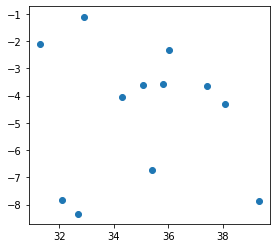

In [61]:
pts = gpd.GeoDataFrame.from_file('glwd_1.shp')
tza = pts[pts['COUNTRY'] == 'Tanzania']


env = tza['geometry']
envgdf = gpd.GeoDataFrame(gpd.GeoSeries(env))
envgdf = envgdf.rename(columns={0:'geometry'}).set_geometry('geometry')
envgdf['centroid'] = envgdf.centroid
centroid = envgdf.set_geometry('centroid')
centroid.plot();

In [62]:
centroid = pd.DataFrame(centroid['centroid'])
s = centroid['centroid']
x = s.apply(lambda p: p.x)
x = x.values
# s.apply(lambda p: p.y)

In [63]:
y = s.apply(lambda p: p.y)
y = y.values

In [64]:
from shapely.geometry import MultiPoint
points2 = envgdf.copy()
points2.geometry = points2.geometry.apply(lambda x: MultiPoint(list(x.exterior.coords)))
lake_victoria = points2.iloc[0]['geometry']
victoria = [(pt.x, pt.y) for pt in lake_victoria]
vic = pd.DataFrame(victoria)
vic = vic.round(decimals=0)
a = vic.values

rukwa = points2.iloc[1]['geometry']
rukwa_points = [(pt.x, pt.y) for pt in rukwa]
ruk = pd.DataFrame(rukwa_points)
ruk = ruk.round(decimals=0)
b = ruk.values

eyasi = points2.iloc[2]['geometry']
eyasi_points = [(pt.x, pt.y) for pt in eyasi]
eya = pd.DataFrame(eyasi_points)
eya = eya.round(decimals=0)
c = eya.values

ind259 = points2.iloc[3]['geometry']
ind259 = [(pt.x, pt.y) for pt in ind259]
ind259 = pd.DataFrame(ind259)
ind259 = ind259.round(decimals=0)
d = ind259.values

natron = points2.iloc[4]['geometry']
natron = [(pt.x, pt.y) for pt in natron]
natron = pd.DataFrame(natron)
natron = natron.round(decimals=0)
e = natron.values

manyara = points2.iloc[5]['geometry']
manyara = [(pt.x, pt.y) for pt in manyara]
manyara = pd.DataFrame(manyara)
manyara = manyara.round(decimals=0)
f = manyara.values

ind773 = points2.iloc[6]['geometry']
ind773 = [(pt.x, pt.y) for pt in ind773]
ind773 = pd.DataFrame(ind773)
ind773 = ind773.round(decimals=0)
g = ind773.values

ikuletwa = points2.iloc[7]['geometry']
ikuletwa = [(pt.x, pt.y) for pt in ikuletwa]
ikuletwa = pd.DataFrame(ikuletwa)
ikuletwa = ikuletwa.round(decimals=0)
h = ikuletwa.values

kitangiri = points2.iloc[8]['geometry']
kitangiri = [(pt.x, pt.y) for pt in kitangiri]
kitangiri = pd.DataFrame(kitangiri)
kitangiri = kitangiri.round(decimals=0)
i = kitangiri.values

burigi = points2.iloc[9]['geometry']
burigi = [(pt.x, pt.y) for pt in burigi]
burigi = pd.DataFrame(burigi)
burigi = burigi.round(decimals=0)
k = burigi.values

top9water = np.concatenate((a,b,c,d,e,f,g,h,i,k), axis = 0)

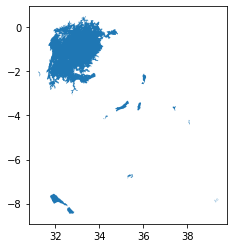

In [65]:
tza.plot()

In [500]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# Merge train_features.csv & train_labels.csv
train = pd.merge(pd.read_csv('https://drive.google.com/uc?export=download&id=14ULvX0uOgftTB2s97uS8lIx1nHGQIB0P'), 
                 pd.read_csv('https://drive.google.com/uc?export=download&id=1r441wLr7gKGHGLyPpKauvCuUOU556S2f'))

pop1 = pd.read_csv('tza_pop_adm1.csv')
pop2 = pd.read_csv('tza_pop_adm2.csv')
pop3 = pd.read_csv('tza_pop_adm3.csv')

trainwithpopulation1 = pd.merge(train, pop1, how='outer', left_on = 'region', right_on = 'ADM1_EN')
train = trainwithpopulation1.iloc[0:59400]

# Read test_features.csv & sample_submission.csv
test = pd.read_csv('https://drive.google.com/uc?export=download&id=1wvsYl9hbRbZuIuoaLWCsW_kbcxCdocHz')
sample_submission = pd.read_csv('https://drive.google.com/uc?export=download&id=1kfJewnmhowpUo381oSn3XqsQ6Eto23XV')

testwithpopulation1 = pd.merge(test, pop1, how='outer', left_on = 'region', right_on = 'ADM1_EN')
test = trainwithpopulation1.iloc[0:14358]

# Split train into train & val
train, val = train_test_split(train, train_size=0.80, test_size=0.20, 
                              stratify=train['status_group'], random_state=42)

# Print dataframe shapes
print('train', train.shape)
print('val', val.shape)
print('test', test.shape)

train (47520, 55)
val (11880, 55)
test (14358, 55)


In [501]:
train = train.round(decimals = 0)
val = val.round(decimals = 0)
test = test.round(decimals = 0)

In [502]:
train['source'].unique

<bound method Series.unique of 43314                  spring
5058                   spring
1682                   spring
620                    spring
52381                   river
6441              machine dbh
1742                   spring
54651            shallow well
26737                   river
44236             machine dbh
29747                  spring
6544                     lake
29122                  spring
4479                   spring
57562                   river
955                    spring
1395                   spring
59024             machine dbh
41639            shallow well
7931              machine dbh
3589                    river
35164            shallow well
28214             machine dbh
54509             machine dbh
30161             machine dbh
10591            shallow well
47694             machine dbh
15406                  spring
51131                  spring
10349            shallow well
3821                   spring
30832             machine dbh
3990     

In [503]:
tza = tza.round(decimals=0)
tza

,GLWD_ID,TYPE,LAKE_NAME,DAM_NAME,POLY_SRC,AREA_SKM,PERIM_KM,LONG_DEG,LAT_DEG,ELEV_M,CATCH_TSKM,INFLOW_CMS,VOLUME_CKM,VOL_SRC,COUNTRY,SEC_CNTRY,RIVER,NEAR_CITY,MGLD_TYPE,MGLD_AREA,LRS_AREA,LRS_AR_SRC,LRS_CATCH,DAM_HEIGHT,DAM_YEAR,USE_1,USE_2,USE_3,geometry
2,3,Lake,Lake Victoria,Owen Falls (Lake Victoria),DCW,67075.00,6041.00,33.00,-1.00,1140,258.00,1202.00,205.00,LRs,Tanzania,"+2: Uganda, Kenya",Nile,Jinta,open,68800.00,69000.00,Other,0.00,31.00,1954.00,i,h,None,POLYGON ((32.66240692138672 0.1229983940720558...
85,86,Lake,Rukwa,None,DCW,1966.00,259.00,32.00,-8.00,757,32.00,97.00,nan,None,Tanzania,None,None,None,closedx,3700.00,nan,None,nan,nan,nan,None,None,None,POLYGON ((31.87483215332031 -7.584412574768066...
155,156,Lake,Eyasi,None,DCW,1113.00,217.00,35.00,-4.00,1023,58.00,134.00,nan,None,Tanzania,None,None,None,closed,1200.00,nan,None,nan,nan,nan,None,None,None,POLYGON ((35.29705429077148 -3.331587553024292...
259,260,Lake,None,None,DCW,682.00,147.00,33.00,-8.00,793,18.00,85.00,nan,None,Tanzania,None,None,None,None,nan,nan,None,nan,nan,nan,None,None,None,POLYGON ((32.56425476074219 -8.195359230041504...
321,322,Lake,Natron,None,DCW,563.00,156.00,36.00,-2.00,583,47.00,82.00,nan,None,Tanzania,Kenya,None,None,closed,600.00,nan,None,nan,nan,nan,None,None,None,POLYGON ((35.92628479003906 -2.572811841964722...
396,397,Lake,Manyara,None,DCW,466.00,114.00,36.00,-4.00,1175,10.00,10.00,nan,None,Tanzania,None,None,None,closed,500.00,nan,None,nan,nan,nan,None,None,None,POLYGON ((35.80641937255859 -3.433562994003296...
773,774,Reservoir,None,None,WCMC,244.00,128.00,35.00,-7.00,944,28.00,16.00,4.00,Statistics,Tanzania,None,None,None,None,nan,nan,None,nan,nan,nan,None,None,None,POLYGON ((35.29897689819336 -6.855851650238037...
1217,1218,Reservoir,Kikuletwa,Nyumba Ya Mungu (Nym Dam),DCW,153.00,68.00,37.00,-4.00,829,8.00,26.00,1.00,ICOLD_LRs,Tanzania,None,Pangani,None,res,200.00,93.00,Statistics,0.00,42.00,1966.00,h,i,None,POLYGON ((37.46337127685547 -3.579497098922729...
1732,1733,Lake,Kitangiri,None,DCW,105.00,77.00,34.00,-4.00,1035,44.00,100.00,nan,None,Tanzania,None,None,None,closedx,100.00,nan,None,nan,nan,nan,None,None,None,POLYGON ((34.34895324707031 -4.004952907562256...
2348,2349,Lake,Burigi,None,DCW,77.00,72.00,31.00,-2.00,1217,4.00,20.00,nan,None,Tanzania,None,None,None,open,100.00,nan,None,nan,nan,nan,None,None,None,"POLYGON ((31.29833984375 -2.230633497238159, 3..."


In [504]:
v = [36.7, -1.3]
len(v)

2

In [505]:
def wrangle(X):
    """Wrangles train, validate, and test sets in the same way"""
    X = X.copy()
    
    # About 3% of the time, latitude has small values near zero,
    # outside Tanzania, so we'll treat these values like zero.
    X['latitude'] = X['latitude'].replace(-2e-08, 0)
#     X['latitude'] = (X['latitude'] < -10) & (X['latitude'] > -2)
#     X['longitude'] = (X['longitude'] < 38) & (X['latitude'] > 35)
#     X['combinedlocation'] = X[['longitude','latitude']].values.tolist()
#     X['Within69mileswater'] = X['combinedlocation'] in top9water
#     if value in top9water[:, ]
#     X['Within.7mileswater'] = X['combinedlocation'].isin(top9water)
#     X['nearCentroidWater_lat'] = X['latitude'].isin([-1., -8., -4., -8., -2., -4., -7., -4., -4., -2., -4., -8.])
#     X['nearCentroidWater_lat'] = X['latitude'].isin([33., 32., 35., 33., 36., 36., 35., 37., 34., 31., 38., 39.])
    
    # When columns have zeros and shouldn't, they are like null values.
    # So we will replace them with the column mean.
    cols_with_zeros = ['construction_year', 'longitude', 'latitude']
    for col in cols_with_zeros:
        X[col] = X[col].replace(0, np.nan)
        X[col] = X[col].fillna(X[col].mean())#using the average of a specific district
        
    # Convert date_recorded to datetime
    X['date_recorded'] = pd.to_datetime(X['date_recorded'], infer_datetime_format=True)
    
    # Extract year from date_recorded
    X['year_recorded'] = X['date_recorded'].dt.year
    X['month_recorded'] = X['date_recorded'].dt.month
    #Extract Never payed in separate column
    X['neverpay'] = X['payment'] == 'never pay'
    
    # quantity & quantity_group are duplicates, so drop one
    X = X.drop(['quantity_group','ADM1_EN', 'date_recorded',
                'ADM1_PCODE', 'ADM0_PCODE','TOTAL_BOTH','URBAN_BOTH'], axis=1)
    
    
    # When columns have zeros and shouldn't, they are like null values
    cols_with_zeros = ['construction_year', 'longitude', 'latitude', 'gps_height', 'population']
    for col in cols_with_zeros:
        X[col] = X[col].replace(0, np.nan)
        
    # For categoricals with missing values, fill with the category 'MISSING'
    categoricals = X.select_dtypes(exclude='number').columns
    for col in categoricals:
        X[col] = X[col].fillna('MISSING')
    
    return X


train = wrangle(train)
val = wrangle(val)
test = wrangle(test)

In [506]:
def wrangle2(X):
    """Wrangles train, validate, and test sets in the same way"""
    X = X.copy()
#     X['Within69mileswater'] = X['combinedlocation'].values in top9water
    X['SummerLessRain'] = X['month_recorded'].between(5, 10)
    X['ElevationBelow850'] = X['gps_height'] < 850
#     X['populationBelow250'] = X['population'] <= 225
#     X['latitudeLessThan-6'] = X['latitude'] < -6
    X['seasonalOrEnough'] = (X['quantity'] =='enough') | (X['quantity'] =='seasonal')
    X['dryOrInsufficient'] = (X['quantity'] =='dry') | (X['quantity'] =='Insufficient')
    X['quanityNotEnough'] = X['quantity'] != 'enough'
    X['waterpoint_type_communal'] = X['waterpoint_type'].str.contains('communal')
    X['waterpoint_type_communal_other'] = (X['waterpoint_type'] == 'standpipe multiple') & (X['waterpoint_type_group'] == 'other') 
    X['TroubleRegions'] = (X['region'] == 'Mtwara') | (X['region'] == 'Lindi') | (X['region'] == 'Tabora') | (X['region'] == 'Rukwa') | (X['region'] == 'Mara')
    X['TroubleExtraction'] = (X['extraction_type'] == 'swn 80') | (X['extraction_type'] == 'windmill') | (X['extraction_type'] == 'other - play pump') | (X['extraction_type'] == 'mono') | (X['extraction_type'] == 'ksb') | (X['extraction_type'] == 'india mark iii') | (X['extraction_type'] == 'climax')
    X['TroubleExtractionMain'] = (X['extraction_type'] == 'other') | (X['extraction_type'] == 'other - play pump')
    X['amount_tsh_lessthan_300'] = X['amount_tsh'] < 300
    X['constructionYearAbove97'] = X['construction_year'] >= 1997 
    X['constructionYearAbove98'] = X['construction_year'] >= 1998
    X['constructionYearAbove94'] = X['construction_year'] > 1994
    #     X = X.drop(columns=['recorded_by', 'id'])
    return X


train = wrangle2(train)
val = wrangle2(val)
test = wrangle2(test)

In [507]:
top9water

array([[33.,  0.],
       [33.,  0.],
       [33.,  0.],
       ...,
       [31., -2.],
       [31., -2.],
       [31., -2.]])

In [ ]:
train.groupby('extraction_type')['status_group'].value_counts()

extraction_type    status_group           
afridev            functional                   957
                   non functional               426
                   functional needs repair       33
cemo               functional                    35
                   non functional                30
                   functional needs repair        8
climax             non functional                23
                   functional                     7
gravity            functional                 12922
                   non functional              6420
                   functional needs repair     2176
india mark ii      functional                  1139
                   non functional               687
                   functional needs repair       61
india mark iii     non functional                42
                   functional                    38
                   functional needs repair        1
ksb                functional                   579
                   no

In [ ]:
train.groupby('region')['status_group'].value_counts()

region         status_group           
Arusha         functional                 1857
               non functional              717
               functional needs repair     145
Dar es Salaam  functional                  363
               non functional              263
               functional needs repair       3
Dodoma         non functional              788
               functional                  773
               functional needs repair     173
Iringa         functional                 3341
               non functional              823
               functional needs repair     104
Kagera         functional                 1397
               non functional             1033
               functional needs repair     254
Kigoma         functional                 1087
               non functional              657
               functional needs repair     475
Kilimanjaro    functional                 2129
               non functional             1114
               functi

In [ ]:
# tza['LONG_DEG'].values

In [ ]:
# def wrangle(X):
#     for i in X['latitude']:
#         if i in y:
#             X['nearWater']=True
#         else:
#             X['nearWater']=False
# train = wrangle(train)
# # val = wrangle(val)
# # test = wrangle(test)

In [ ]:
type(train)

pandas.core.frame.DataFrame

In [ ]:
from sklearn.pipeline import make_pipeline
# %%time
from sklearn.ensemble import RandomForestClassifier
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier

# The status_group column is the target
target = 'status_group'

# Get a dataframe with all train columns except the target
train_features = train.drop(columns=[target])

# Get a list of the numeric features
numeric_features = train_features.select_dtypes(include='number').columns.tolist()

# Get a series with the cardinality of the nonnumeric features
cardinality = train_features.select_dtypes(exclude='number').nunique()

# Get a list of all categorical features with cardinality <= 50
categorical_features = cardinality[cardinality <= 50].index.tolist()

# Combine the lists 
features = numeric_features + categorical_features

# Arrange data into X features matrix and y target vector 
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]

# Make pipeline!
pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True), 
    SimpleImputer(strategy='median'), 
    DecisionTreeClassifier(max_depth=20, random_state=42)
)

# Fit on train, score on val, predict on test
pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))
y_pred = pipeline.predict(X_test)

In [ ]:
X_train.head(2)

In [ ]:
import seaborn as sns
feature = 'quantity'
sns.barplot(x=train[feature], 
            y=train['gps_height']);

In [ ]:
import seaborn as sns
feature = 'quantity'
sns.barplot(x=train[feature], 
            y=train['population']);

In [ ]:
import seaborn as sns
feature = 'quantity'
g = sns.barplot(x=train[feature], 
            y=train['population']);
g.set(ylim=(200, 320))

In [ ]:
import seaborn as sns
feature = 'quantity'
sns.barplot(x=train[feature], 
            y=train['month_recorded']);

In [ ]:
import seaborn as sns
feature = 'quantity'
sns.barplot(x=train[feature], 
            y=train['amount_tsh']);

In [ ]:
import seaborn as sns
feature = 'quantity'
g = sns.barplot(x=train[feature], 
            y=train['construction_year'])
g.set(ylim=(1993, 1998))

In [ ]:
# Get feature importances
encoder = pipeline.named_steps['onehotencoder']
tree = pipeline.named_steps['decisiontreeclassifier']
feature_names = encoder.transform(X_val).columns
importances = pd.Series(tree.feature_importances_, feature_names)

# Plot feature importances
n = 20
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='grey');

In [ ]:
# %matplotlib inline
# import numpy as np
# import matplotlib.pyplot as plt
# forgeoplotting = train.loc[train['longitude'] != 0]
# train.shape, forgeoplotting.shape
# colors = np.where(forgeoplotting['status_group']=='functional','y','k')
# forgeoplotting.plot.scatter(x = 'longitude', y = 'latitude', c = colors, alpha = 0.1)

In [ ]:
pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

# Fit on train, score on val
pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))

In [ ]:
%%time
# Arrange data into X features matrix and y target vector
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

# Fit on train, score on val
pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))

In [ ]:
X_test.head(2)

In [ ]:
y_pred = pipeline.predict(X_test)
submission = sample_submission.copy()
submission['status_group'] = y_pred
submission.to_csv('submission-07.csv', index=False)